# SQL  queries

In [1]:
# select cd.year, cl.city, cl.country, cd.avg_temp 
# from city_list cl
# left join city_data cd on cd.city = cl.city
# where cl.country = 'Brazil'
# and cl.city ilike 'Rio De Janeiro'

# select * from global_data

# Python data wrangling and analysis

## Sources used for specific purposes 

In [2]:
# Creating the regression lines
# https://www.youtube.com/watch?v=EMIyRmrPWJQ  
# https://stackoverflow.com/questions/13675912/python-programming-numpy-polyfit-saying-nan

# Setting the grid and tick interval 
#https://stackoverflow.com/questions/24943991/change-grid-interval-and-specify-tick-labels-in-matplotlib

# Calculating the second derivative in order to evaluate if there was an inflexion point near the industrial revolution
# https://stackoverflow.com/questions/45063260/finding-the-point-of-a-slope-change-as-a-free-parameter-python


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)
pd.set_option('display.max_rows', 200)

In [4]:
df_cities = pd.read_csv("./data/city_temps.csv")
df_cities.head(10)

,year,city,country,avg_temp
0,1832,Rio De Janeiro,Brazil,23.05
1,1833,Rio De Janeiro,Brazil,24.11
2,1834,Rio De Janeiro,Brazil,23.27
3,1835,Rio De Janeiro,Brazil,22.73
4,1836,Rio De Janeiro,Brazil,22.91
5,1837,Rio De Janeiro,Brazil,22.29
6,1838,Rio De Janeiro,Brazil,22.81
7,1839,Rio De Janeiro,Brazil,22.54
8,1840,Rio De Janeiro,Brazil,23.32
9,1841,Rio De Janeiro,Brazil,22.97


In [5]:
df_global = pd.read_csv("./data/global_temps.csv")
df_global.head(10)

,year,avg_temp
0,1750,8.72
1,1751,7.98
2,1752,5.78
3,1753,8.39
4,1754,8.47
5,1755,8.36
6,1756,8.85
7,1757,9.02
8,1758,6.74
9,1759,7.99


In [6]:
[df_cities.shape, df_global.shape]

[(182, 4), (266, 2)]

In [7]:
df = pd.merge(df_global, df_cities, how = "outer", on =["year"]).sort_values(by=["year"])
df.head(200)

,year,avg_temp_x,city,country,avg_temp_y
0,1750,8.72,NaN,NaN,NaN
1,1751,7.98,NaN,NaN,NaN
2,1752,5.78,NaN,NaN,NaN
3,1753,8.39,NaN,NaN,NaN
4,1754,8.47,NaN,NaN,NaN
5,1755,8.36,NaN,NaN,NaN
6,1756,8.85,NaN,NaN,NaN
7,1757,9.02,NaN,NaN,NaN
8,1758,6.74,NaN,NaN,NaN
9,1759,7.99,NaN,NaN,NaN


In [8]:
df.rename(columns = 
          {'avg_temp_y':'city_temp',
          'avg_temp_x':'global_temp'}, inplace = True)
df.head(50)

,year,global_temp,city,country,city_temp
0,1750,8.72,NaN,NaN,NaN
1,1751,7.98,NaN,NaN,NaN
2,1752,5.78,NaN,NaN,NaN
3,1753,8.39,NaN,NaN,NaN
4,1754,8.47,NaN,NaN,NaN
5,1755,8.36,NaN,NaN,NaN
6,1756,8.85,NaN,NaN,NaN
7,1757,9.02,NaN,NaN,NaN
8,1758,6.74,NaN,NaN,NaN
9,1759,7.99,NaN,NaN,NaN


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 266 entries, 0 to 265
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   year         266 non-null    int64  
 1   global_temp  266 non-null    float64
 2   city         182 non-null    object 
 3   country      182 non-null    object 
 4   city_temp    175 non-null    float64
dtypes: float64(2), int64(1), object(2)
memory usage: 12.5+ KB


In [10]:
first_years = (
               df.loc[df['global_temp'].first_valid_index()].iloc[0], 
               df.loc[df['city_temp'].first_valid_index()].iloc[0])
first_years_index = (
               df.index[df['global_temp'].first_valid_index()], 
               df.index[df['city_temp'].first_valid_index()]
              )
first_years, first_years_index

((1750, 1832), (0, 82))

In [11]:
df = df[max(first_years_index):]
df

,year,global_temp,city,country,city_temp
82,1832,7.45,Rio De Janeiro,Brazil,23.05
83,1833,8.01,Rio De Janeiro,Brazil,24.11
84,1834,8.15,Rio De Janeiro,Brazil,23.27
85,1835,7.39,Rio De Janeiro,Brazil,22.73
86,1836,7.70,Rio De Janeiro,Brazil,22.91
87,1837,7.38,Rio De Janeiro,Brazil,22.29
88,1838,7.51,Rio De Janeiro,Brazil,22.81
89,1839,7.63,Rio De Janeiro,Brazil,22.54
90,1840,7.80,Rio De Janeiro,Brazil,23.32
91,1841,7.69,Rio De Janeiro,Brazil,22.97


## Moving average calculation

In [12]:
df['global_temp_10y_MA'] = df['global_temp']  .rolling(10).mean()
df['city_temp_10y_MA'] = df['city_temp']      .rolling(10).mean()

df['diff']    = df['city_temp'] - df['global_temp']
df['diff_10y_MA'] = df['diff']      .rolling(10).mean()


df.head(10)

,year,global_temp,city,country,city_temp,global_temp_10y_MA,city_temp_10y_MA,diff,diff_10y_MA
82,1832,7.45,Rio De Janeiro,Brazil,23.05,NaN,NaN,15.60,NaN
83,1833,8.01,Rio De Janeiro,Brazil,24.11,NaN,NaN,16.10,NaN
84,1834,8.15,Rio De Janeiro,Brazil,23.27,NaN,NaN,15.12,NaN
85,1835,7.39,Rio De Janeiro,Brazil,22.73,NaN,NaN,15.34,NaN
86,1836,7.70,Rio De Janeiro,Brazil,22.91,NaN,NaN,15.21,NaN
87,1837,7.38,Rio De Janeiro,Brazil,22.29,NaN,NaN,14.91,NaN
88,1838,7.51,Rio De Janeiro,Brazil,22.81,NaN,NaN,15.30,NaN
89,1839,7.63,Rio De Janeiro,Brazil,22.54,NaN,NaN,14.91,NaN
90,1840,7.80,Rio De Janeiro,Brazil,23.32,NaN,NaN,15.52,NaN
91,1841,7.69,Rio De Janeiro,Brazil,22.97,7.671,23.0,15.28,15.329


In [13]:
x = df['year']
y_global = df['global_temp']
y_city = df['city_temp']
y_diff = df['diff']

y_global_MA = df['global_temp_10y_MA']
y_city_MA   = df['city_temp_10y_MA']
y_diff_MA   = df['diff_10y_MA']


## Data visualization

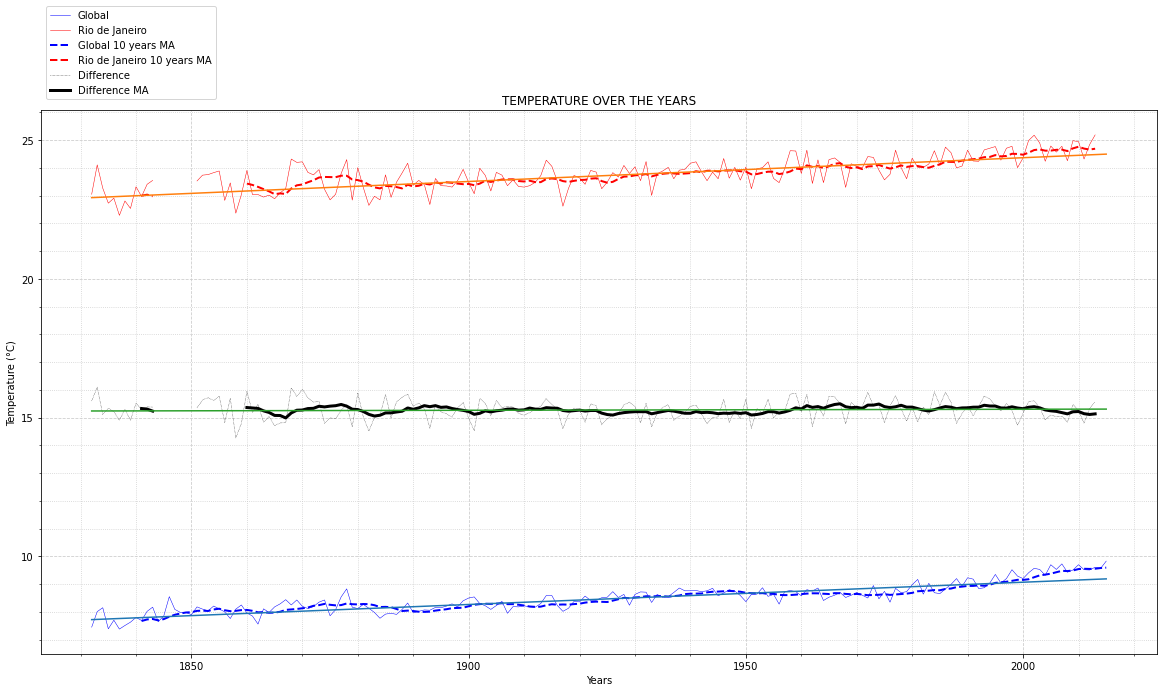

In [14]:
fig, ax = plt.subplots(figsize=(20, 10))

ax.xaxis.set_major_locator(MultipleLocator(50))
ax.yaxis.set_major_locator(MultipleLocator(5))

ax.xaxis.set_minor_locator(MultipleLocator(10))
ax.yaxis.set_minor_locator(MultipleLocator(1))

ax.grid(which='major', color='#CCCCCC', linestyle='--')
ax.grid(which='minor', color='#CCCCCC', linestyle=':')

plt.plot(x,y_global, label = "Global"       ,color = 'blue', linewidth = 0.5)
plt.plot(x,y_city, label = "Rio de Janeiro" ,color = 'red' , linewidth = 0.5)

plt.plot(x,y_global_MA, label = "Global 10 years MA"            , color = 'blue', linestyle = '--' , linewidth = 2.0)
plt.plot(x,y_city_MA, label = "Rio de Janeiro 10 years MA"    , color = 'red', linestyle = '--'    , linewidth = 2.0)
plt.plot(x,y_diff, label = "Difference"    , color = 'black', linestyle = 'dotted'    , linewidth = 0.5)
plt.plot(x,y_diff_MA, label = "Difference MA"    , color = 'black', linestyle = 'solid'    , linewidth = 3.0)



plt.title("TEMPERATURE OVER THE YEARS")
plt.xlabel("Years")
plt.ylabel("Temperature (°C)")


plt.grid(True, which ="both" )


idx = np.isfinite(x) & np.isfinite(y_global_MA)
slope_global,intercept = np.polyfit(x[idx], y_global_MA[idx], 1)
plt.plot(x, slope_global*x + intercept)

idx = np.isfinite(x) & np.isfinite(y_city_MA)
slope_city,intercept = np.polyfit(x[idx], y_city_MA[idx], 1)
plt.plot(x, slope_city*x + intercept)

idx = np.isfinite(x) & np.isfinite(y_diff_MA)
slope_diff,intercept = np.polyfit(x[idx], y_diff_MA[idx], 1)
plt.plot(x, slope_diff*x + intercept)


ax.legend(loc='upper left', bbox_to_anchor=(0, 1.2))
plt.show()

## Correlation coefficient

In [15]:
df['global_temp_10y_MA'].corr(df['city_temp_10y_MA'], method = "pearson")

0.9677548684994313

In [16]:
slope_city, slope_global, abs(slope_city - slope_global)

(0.00856813087389343, 0.008023345275414238, 0.0005447855984791923)

In [17]:
1/slope_city, 1/slope_global

(116.71156926966869, 124.63629143124106)

In [18]:
temp_city_range   =  {"min":df['city_temp_10y_MA'].min(),
                    "max":df['city_temp_10y_MA'].max(),
                    "var": df['city_temp_10y_MA'].max() - df['city_temp_10y_MA'].min()}

temp_global_range   =  {"min":df['global_temp_10y_MA'].min(),
                     "max":df['global_temp_10y_MA'].max(),
                     "var": df['global_temp_10y_MA'].max() - df['global_temp_10y_MA'].min()}

temp_diff_range   =  {"min":df['diff_10y_MA'].min(),
                    "max":df['diff_10y_MA'].max(),
                    "var": df['diff_10y_MA'].max() - df['diff_10y_MA'].min()}

temp_city_range  ["min_year"] = df.loc[df['city_temp_10y_MA']    == temp_city_range["min"],   'year'].iloc[0]
temp_city_range  ["max_year"] = df.loc[df['city_temp_10y_MA']    == temp_city_range["max"],   'year'].iloc[0]
temp_global_range["min_year"] = df.loc[df['global_temp_10y_MA']  == temp_global_range["min"], 'year'].iloc[0]
temp_global_range["max_year"] = df.loc[df['global_temp_10y_MA']  == temp_global_range["max"], 'year'].iloc[0]
temp_diff_range  ["min_year"] = df.loc[df['diff_10y_MA']         == temp_diff_range["min"],   'year'].iloc[0]
temp_diff_range  ["max_year"] = df.loc[df['diff_10y_MA']         == temp_diff_range["max"],   'year'].iloc[0]


{"temp_city_range":  temp_city_range,
 "temp_global_range":temp_global_range,

 "temp_diff_range":  temp_diff_range}

{'temp_city_range': {'min': 22.98,
  'max': 24.764000000000003,
  'var': 1.7840000000000025,
  'min_year': 1843,
  'max_year': 2010},
 'temp_global_range': {'min': 7.670999999999999,
  'max': 9.594,
  'var': 1.923,
  'min_year': 1841,
  'max_year': 2015},
 'temp_diff_range': {'min': 14.99,
  'max': 15.5,
  'var': 0.5099999999999998,
  'min_year': 1867,
  'max_year': 1967}}

## Derivatives analysis

Text(0.5, 1.0, 'Global temp 2nd derivative')

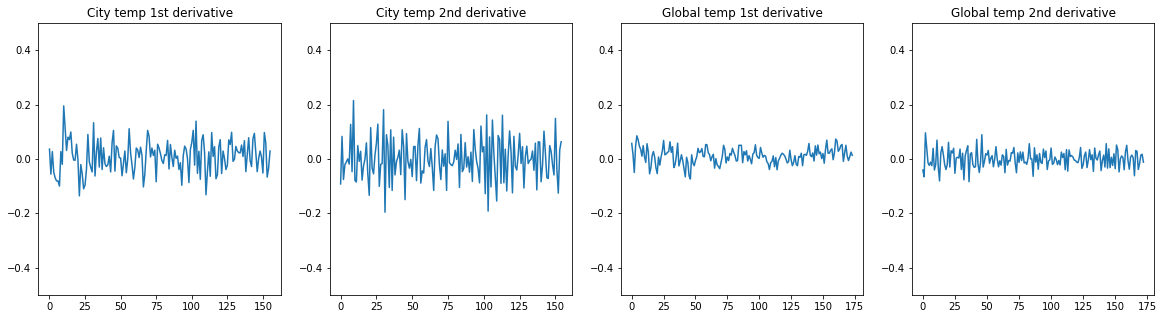

In [19]:
fig, ax = plt.subplots(1,4, figsize=(20, 5))

mask = np.isfinite(y_city_MA)
derivative1_city = np.diff(y_city_MA[mask])     / np.diff(df['year'][mask])
derivative2_city = np.diff(derivative1_city)

plt.subplot(1,4,1)
plt.ylim(-0.5, 0.5)
plt.plot(derivative1_city)
plt.title("City temp 1st derivative")

plt.subplot(1,4,2)
plt.ylim(-0.5, 0.5)
plt.plot(derivative2_city)
plt.title("City temp 2nd derivative")




mask = np.isfinite(y_global_MA)
derivative1_global = np.diff(y_global_MA[mask]) / np.diff(df['year'][mask])
derivative2_global = np.diff(derivative1_global)

plt.subplot(1,4,3)
plt.ylim(-0.5, 0.5)
plt.plot(derivative1_global)
plt.title("Global temp 1st derivative")


plt.subplot(1,4,4)
plt.ylim(-0.5, 0.5)
plt.plot(derivative2_global)
plt.title("Global temp 2nd derivative")


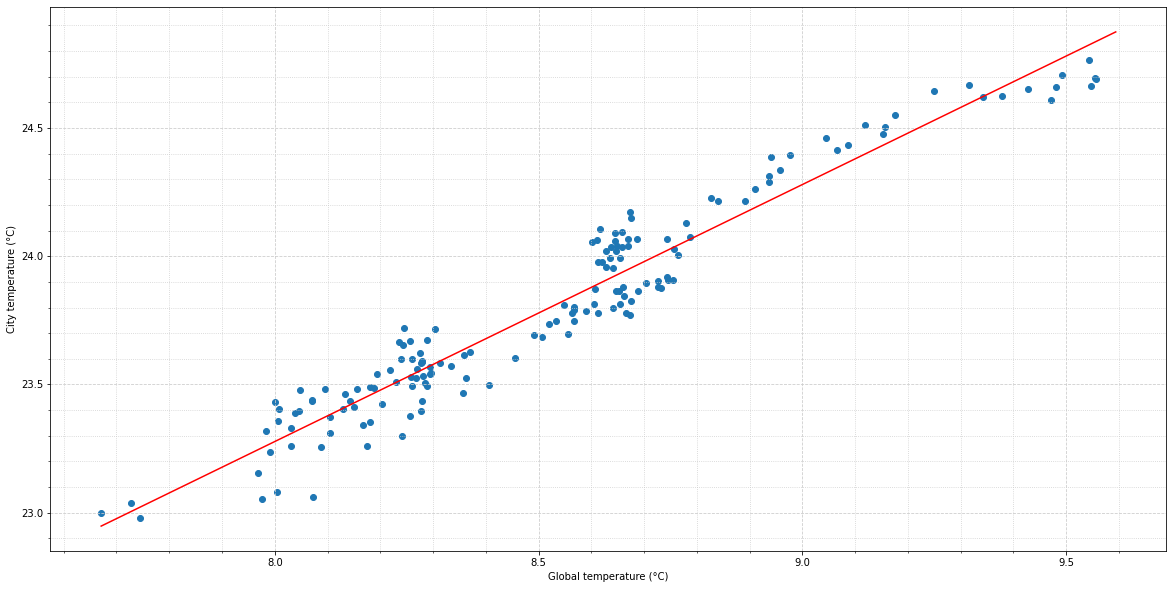

In [20]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.xaxis.set_major_locator(MultipleLocator(0.5))
ax.yaxis.set_major_locator(MultipleLocator(0.5))

ax.xaxis.set_minor_locator(MultipleLocator(0.1))
ax.yaxis.set_minor_locator(MultipleLocator(0.1))

ax.grid(which='major', color='#CCCCCC', linestyle='--')
ax.grid(which='minor', color='#CCCCCC', linestyle=':')


mask = np.isfinite(y_city_MA) & np.isfinite(y_global_MA)
slope,interception = np.polyfit(y_global_MA[mask], y_city_MA[mask], deg = 1)
reg = slope,interception
trend = np.polyval(reg, y_global_MA) 




plt.xlabel("Global temperature (°C)")
plt.ylabel("City temperature (°C)")

plt.plot(y_global_MA,trend, 'r')
plt.scatter(y_global_MA, y_city_MA)

In [21]:
reg

(1.0021917554158453, 15.259902131042605)

In [22]:
def rio_temp (temp_global):
    return slope*temp_global + interception


rio_temp(30)
# 45.32565479351796

45.32565479351796